# GEOCODING PLACES OF WORSHIP IN NEW YORK STATE

The dataset being used contains geographic information on all of the nearly 50,000 places of worship located within the continental U.S, however, for the sake of brevity we will only aim to obtain the coordinates of places of worship in the state of New York.

### Required libraries

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Bing
import folium
import seaborn as sns
import matplotlib as plt

### Initial Dataset

In [2]:
df = pd.read_csv('data/all_places_of_worship.csv')

In [3]:
df.head()

,objectid,id,name,telephone,address,address2,city,state,zip,zipp4,...,phoneloc,qc_qa,state_id,subtype,denom,members,attendance,loc_type,prot,cath
0,1001,10438385.0,FREMONT PRESBYTERIAN CHURCH,916-452-7132,5770 CARLSON DRIVE,NOT AVAILABLE,SACRAMENTO,CA,95819,2553.0,...,NaN,TGS,NOT AVAILABLE,CHRISTIAN,PCUSA,1292,800,NOT AVAILABLE,Y,N
1,1002,10438397.0,LAFAYETTE - ORINDA PRESBYTERIAN CHURCH,925-283-8722,49 KNOX DRIVE,NOT AVAILABLE,LAFAYETTE,CA,94549,3322.0,...,NaN,TGS,NOT AVAILABLE,CHRISTIAN,PCUSA,1971,775,NOT AVAILABLE,Y,N
2,1003,10438425.0,WALNUT CREEK PRESBYTERIAN CHURCH,925-935-1574,1801 LACASSIE AVENUE,NOT AVAILABLE,WALNUT CREEK,CA,94596,4016.0,...,NaN,TGS,NOT AVAILABLE,CHRISTIAN,PCUSA,1290,914,NOT AVAILABLE,Y,N
3,1004,10431831.0,MUHAJEREEN MOSQUE,510-786-0313,185 FOLSOM AVENUE,NOT AVAILABLE,HAYWARD,CA,94544,6504.0,...,NaN,TGS,NOT AVAILABLE,MUSLIM,NOT AVAILABLE,NOT AVAILABLE,0,NOT AVAILABLE,N,N
4,1005,10438443.0,THE CHURCH OF JESUS CHRIST OF LATTER DAY SAINT...,916-422-6919,7401 24TH STREET,NOT AVAILABLE,SACRAMENTO,CA,95822,5319.0,...,NaN,TGS,NOT AVAILABLE,CHRISTIAN,LDS,NOT AVAILABLE,0,NOT AVAILABLE,Y,N


<br>

#### Most of these columns are unnecessary for our task so we will drop them. We will keep the ['subtype'] column for charting purposes.

<br>

In [4]:
df = df[['name', 'address', 'city', 'state', 'zip', 'subtype']]
df

,name,address,city,state,zip,subtype
0,FREMONT PRESBYTERIAN CHURCH,5770 CARLSON DRIVE,SACRAMENTO,CA,95819,CHRISTIAN
1,LAFAYETTE - ORINDA PRESBYTERIAN CHURCH,49 KNOX DRIVE,LAFAYETTE,CA,94549,CHRISTIAN
2,WALNUT CREEK PRESBYTERIAN CHURCH,1801 LACASSIE AVENUE,WALNUT CREEK,CA,94596,CHRISTIAN
3,MUHAJEREEN MOSQUE,185 FOLSOM AVENUE,HAYWARD,CA,94544,MUSLIM
4,THE CHURCH OF JESUS CHRIST OF LATTER DAY SAINT...,7401 24TH STREET,SACRAMENTO,CA,95822,CHRISTIAN
...,...,...,...,...,...,...
49323,SOUNSA BUDDHIST TEMPLE,3 CAMP STREET,PAXTON,MA,1612,BUDDHIST
49324,CENTRAL BAPTIST CHURCH,14 ELM STREET,WESTERLY,RI,2891,CHRISTIAN
49325,FIRST UNITED METHODIST CHURCH,17 FEDERAL STREET,WOONSOCKET,RI,2895,CHRISTIAN
49326,WASHINGTON VILLAGE CHURCH,33 LIBERTY ROAD,WASHINGTON,ME,4574,CHRISTIAN


<br>

#### Now we will combine 'city', 'state', and 'zip' with the 'address' column to ensure the API is accurate in finding the right place since this is the column we will use along with the API. <br><br> Leaving these factors out would increase the chances of the API geocoding a different location with the same number and street name. 

<br>

In [5]:
df['address'] = df['address'] + ", " + df['city'] + ", " + df['state'] + " " + df['zip'].astype(str)

<br>

#### Now we narrow down our dataset. 

In [6]:
df = df[df['state'] == 'NY']
df

,name,address,city,state,zip,subtype
15736,SAINT PATRICKS CHURCH,"393 CHURCH STREET, HOGANSBURG, NY 13655",HOGANSBURG,NY,13655,CHRISTIAN
15876,SAINT AUGUSTINE'S CHURCH,"2472 UNITED STATES HIGHWAY 11, NORTH BANGOR, N...",NORTH BANGOR,NY,12966,CHRISTIAN
15887,CALVARY BAPTIST CHURCH,"6096 STATE HIGHWAY 37, MASSENA, NY 13662",MASSENA,NY,13662,CHRISTIAN
15984,FIRST BAPTIST CHURCH,"48 HARRISON PLACE, MALONE, NY 12953",MALONE,NY,12953,CHRISTIAN
15985,HOLY ANGELS CHURCH,"524 DEVILS DEN ROAD, ALTONA, NY 12910",ALTONA,NY,12910,CHRISTIAN
...,...,...,...,...,...,...
43758,JACKSON MEMORIAL AFRICAN METHODIST EPISCOPAL Z...,"60 PENINSULA BOULEVARD, HEMPSTEAD, NY 11550",HEMPSTEAD,NY,11550,CHRISTIAN
43759,DAY SPRING GLORY MINISTRIES INCORPORATED,"58 EAST 208TH STREET, BRONX, NY 10467",BRONX,NY,10467,CHRISTIAN
43760,FIRST CHURCH OF CHRIST,"55-06 ARNOLD AVENUE, MASPETH, NY 11378",MASPETH,NY,11378,CHRISTIAN
43761,SACRED HEART CHURCH,"41 ADELPHI STREET, BROOKLYN, NY 11205",BROOKLYN,NY,11205,CHRISTIAN


In [7]:
api_key = 'Aonk2HdEwUzwLLG1zC3Zd1lrusMfBvshkL3iH4GBNm3fhnxgVB4JmbtmKRFvkHXn'
geolocator = Bing(api_key = api_key)

<br>

#### Now that we've put together our geolocator tool using our API key, we create a function to be applied to the ['address'] column of our dataframe. This function below iterates through each row in the ['address'] column and if there the cell is not empty, the function returns the latitude and longitude coordinates.

<br>

In [8]:
def geocode_address(address):
    try:
        location = geolocator.geocode(address, timeout=2)
        if location is not None:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply the geocode_address function to each address in the 'address' column
df["latitude"], df["longitude"] = zip(*df["address"].apply(geocode_address))

C:\Users\ferna\AppData\Local\Temp\ipykernel_8800\4103936035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"], df["longitude"] = zip(*df["address"].apply(geocode_address))
C:\Users\ferna\AppData\Local\Temp\ipykernel_8800\4103936035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"], df["longitude"] = zip(*df["address"].apply(geocode_address))


In [9]:
df.reset_index(drop=True)

,name,address,city,state,zip,subtype,latitude,longitude
0,SAINT PATRICKS CHURCH,"393 CHURCH STREET, HOGANSBURG, NY 13655",HOGANSBURG,NY,13655,CHRISTIAN,44.973086,-74.668707
1,SAINT AUGUSTINE'S CHURCH,"2472 UNITED STATES HIGHWAY 11, NORTH BANGOR, N...",NORTH BANGOR,NY,12966,CHRISTIAN,44.842066,-74.399538
2,CALVARY BAPTIST CHURCH,"6096 STATE HIGHWAY 37, MASSENA, NY 13662",MASSENA,NY,13662,CHRISTIAN,44.949426,-74.848150
3,FIRST BAPTIST CHURCH,"48 HARRISON PLACE, MALONE, NY 12953",MALONE,NY,12953,CHRISTIAN,44.847209,-74.294918
4,HOLY ANGELS CHURCH,"524 DEVILS DEN ROAD, ALTONA, NY 12910",ALTONA,NY,12910,CHRISTIAN,44.890017,-73.655364
...,...,...,...,...,...,...,...,...
2971,JACKSON MEMORIAL AFRICAN METHODIST EPISCOPAL Z...,"60 PENINSULA BOULEVARD, HEMPSTEAD, NY 11550",HEMPSTEAD,NY,11550,CHRISTIAN,40.707999,-73.618065
2972,DAY SPRING GLORY MINISTRIES INCORPORATED,"58 EAST 208TH STREET, BRONX, NY 10467",BRONX,NY,10467,CHRISTIAN,40.879344,-73.882414
2973,FIRST CHURCH OF CHRIST,"55-06 ARNOLD AVENUE, MASPETH, NY 11378",MASPETH,NY,11378,CHRISTIAN,40.714620,-73.909181
2974,SACRED HEART CHURCH,"41 ADELPHI STREET, BROOKLYN, NY 11205",BROOKLYN,NY,11205,CHRISTIAN,40.696575,-73.972348


#### Now that we have geocoded our locations, we can visualize it in a map. To do this, we will use the Folium Python API.

In [10]:
map = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=7) #starting point for our map
for index, row in df.iterrows(): #function for iterating through each address and marking it on the map
    lat, lon = row['latitude'], row['longitude']
    popup_text = f"Name: {row['name']}, Address: {row['address']}, Lat: {lat}, Lon: {lon}"
    marker = folium.Marker(location=[lat, lon], popup=popup_text)
    marker.add_to(map)
map

[Text(0, 0, '2013'),
 Text(0, 0, '654'),
 Text(0, 0, '146'),
 Text(0, 0, '28'),
 Text(0, 0, '126'),
 Text(0, 0, '9')]

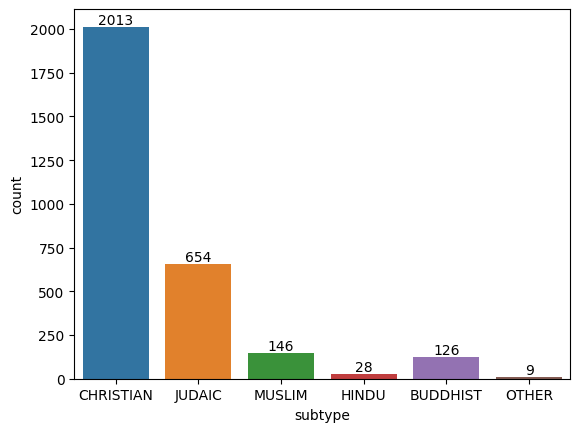

In [13]:
plot = sns.countplot(data = df, x='subtype')
plot.bar_label(plot.containers[0])